In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import requests
from io import StringIO

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/My Drive/archive')

In [7]:
train_data = pd.read_csv('train_aWnotuB.csv')

In [8]:
train_data.shape

(48120, 4)

In [9]:
print(train_data.columns)

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [10]:
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
train_data['year'] = train_data['DateTime'].dt.year
train_data['month'] = train_data['DateTime'].dt.month
train_data['day'] = train_data['DateTime'].dt.day
train_data['hour'] = train_data['DateTime'].dt.hour
train_data['minute'] = train_data['DateTime'].dt.minute


In [28]:
X= X_train = train_data.drop(columns=['Vehicles', 'ID', 'DateTime'])  # Features
y= y_train = train_data['Vehicles']  # Target variable

In [12]:
test_data = pd.read_csv('test_BdBKkAj.csv')

In [13]:
test_data.shape

(11808, 3)

In [14]:
print(test_data.columns)

Index(['DateTime', 'Junction', 'ID'], dtype='object')


In [15]:
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])
test_data['year'] = test_data['DateTime'].dt.year
test_data['month'] = test_data['DateTime'].dt.month
test_data['day'] = test_data['DateTime'].dt.day
test_data['hour'] = test_data['DateTime'].dt.hour
test_data['minute'] = test_data['DateTime'].dt.minute

In [16]:
X_test = test_data.drop(columns=['ID', 'DateTime'])  # Features

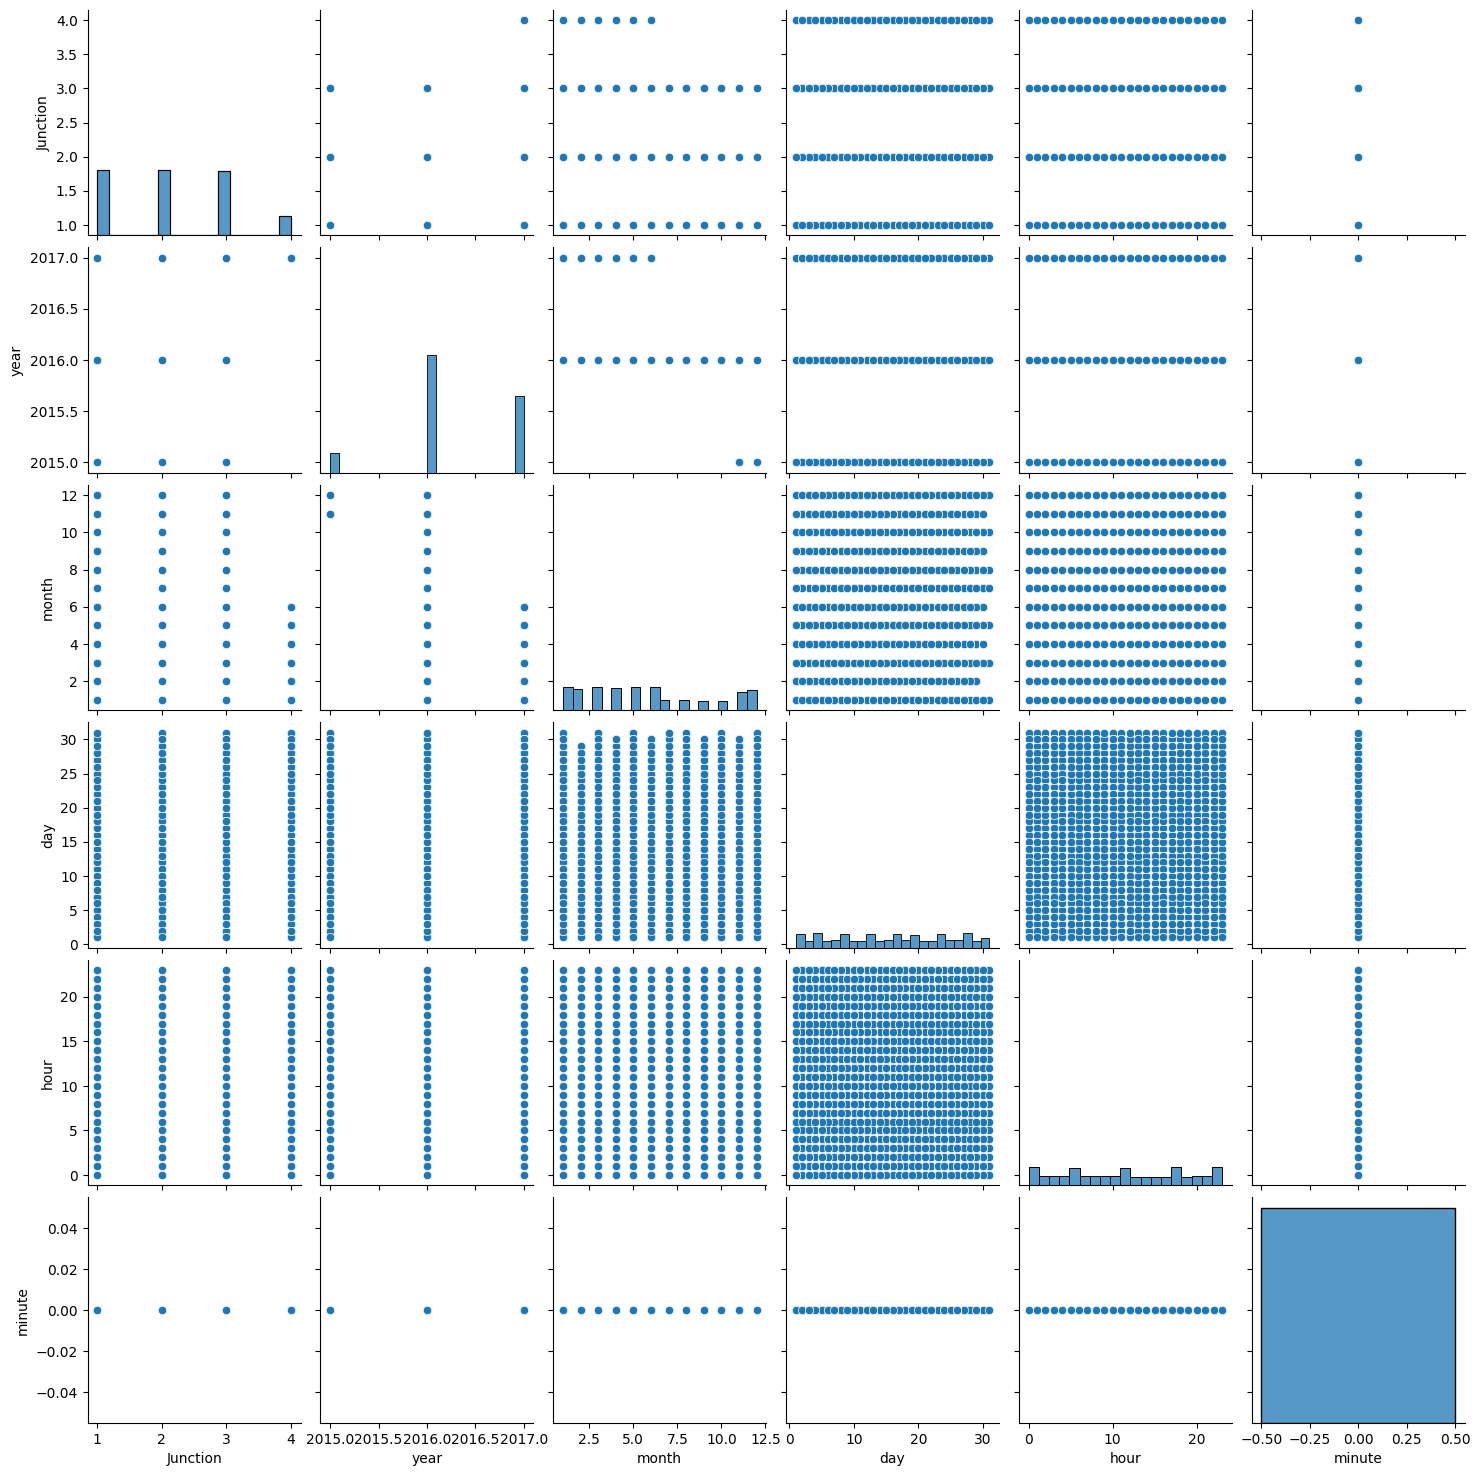

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X_test)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [31]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = random_forest_model.predict(X_test)

In [33]:
print("Shape of y_pred:", y_pred.shape)

Shape of y_pred: (9624,)


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the training set
y_pred_train = random_forest_model.predict(X_train)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Mean Squared Error (MSE) on Training Data:", mse_train)
print("Mean Absolute Error (MAE) on Training Data:", mae_train)


Mean Squared Error (MSE) on Training Data: 2.8118102685993347
Mean Absolute Error (MAE) on Training Data: 1.0734593204488778


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Define thresholds to classify traffic into categories
low_threshold = 50
high_threshold = 100


In [42]:
# Make predictions on the training set
y_pred_train = random_forest_model.predict(X_train)

# Display the predicted values
print("Predicted values:", y_pred_train)


Predicted values: [ 4.9   1.77 16.19 ... 11.59 20.56  5.98]


In [43]:
y_pred_train_classes = []
for pred_train in y_pred_train:
    if pred_train < low_threshold:
        y_pred_train_classes.append('Low')
    elif pred_train < high_threshold:
        y_pred_train_classes.append('Medium')
    else:
        y_pred_train_classes.append('High')

# Convert true target values to classes based on thresholds
y_true_train_classes = []
for true_train_val in y_train:
    if true_train_val < low_threshold:
        y_true_train_classes.append('Low')
    elif true_train_val < high_threshold:
        y_true_train_classes.append('Medium')
    else:
        y_true_train_classes.append('High')



In [44]:
# Compute accuracy on training set
accuracy_train = accuracy_score(y_true_train_classes, y_pred_train_classes)
print("Accuracy:", accuracy_train)

# Compute confusion matrix on training set
conf_matrix_train = confusion_matrix(y_true_train_classes, y_pred_train_classes)
print("Confusion Matrix :")
print(conf_matrix_train)

Accuracy: 0.9904145885286783
Confusion Matrix :
[[  244     0    46]
 [    0 33994    90]
 [    7   226  3889]]


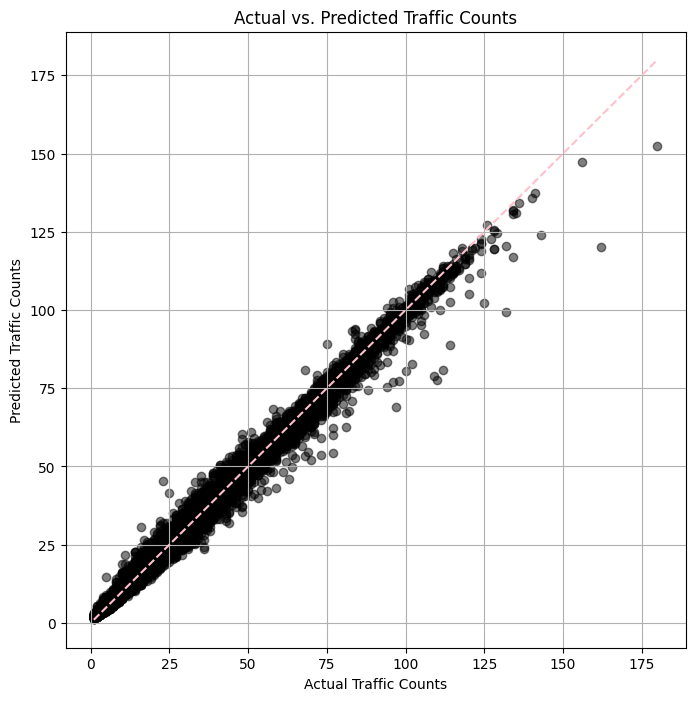

In [48]:
import matplotlib.pyplot as plt

# Create scatter plot for actual vs. predicted traffic counts
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_pred_train, color='Black', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='pink', linestyle='--')
plt.xlabel('Actual Traffic Counts')
plt.ylabel('Predicted Traffic Counts')
plt.title('Actual vs. Predicted Traffic Counts')
plt.grid(True)
plt.show()


<Axes: >

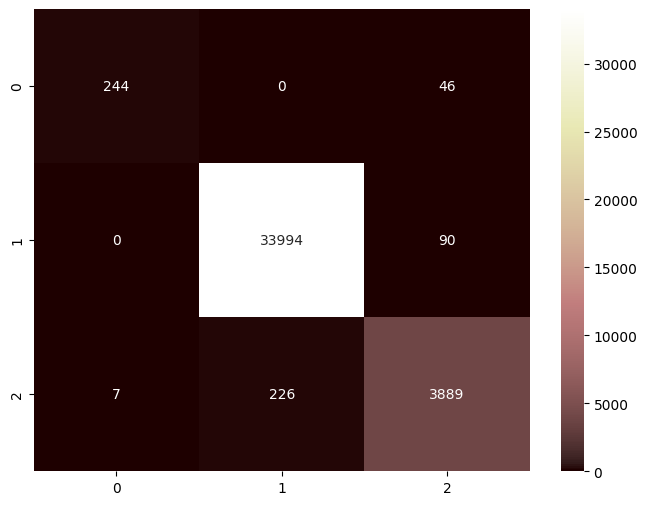

In [49]:
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='pink')


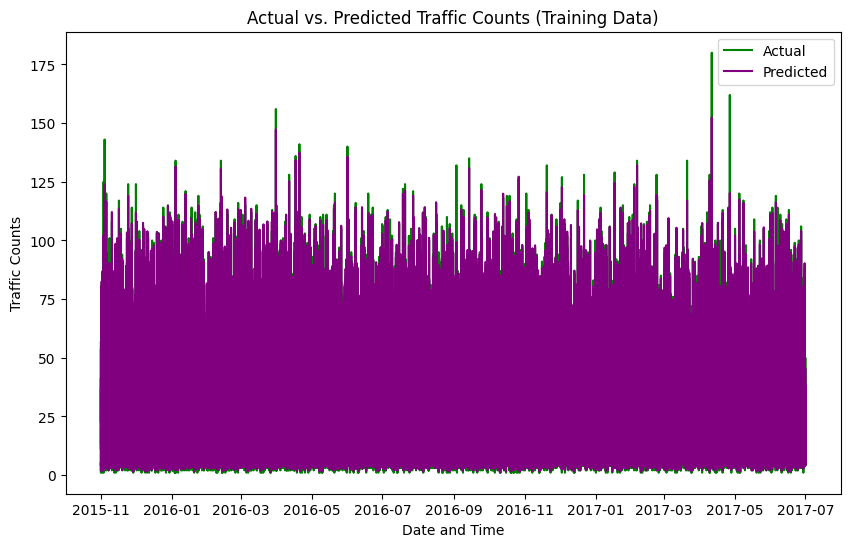

In [51]:
# Truncate arrays to match the desired timeframe (e.g., based on y_train length)
DateTime_plot = train_data['DateTime'][:len(y_train)]
y_train_plot = y_train[:len(y_train)]
y_pred_train_plot = y_pred_train[:len(y_train)]

# Plot actual vs. predicted traffic counts over time
plt.figure(figsize=(10, 6))
plt.plot(DateTime_plot, y_train_plot, label='Actual', color='green')
plt.plot(DateTime_plot, y_pred_train_plot, label='Predicted', color='purple')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Counts')
plt.title('Actual vs. Predicted Traffic Counts (Training Data)')
plt.legend()
plt.show()
